In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import seed_random_generators
seed_random_generators()

In [3]:
from pathlib import Path
OUTPUT_DIR = Path("output/baseline")

from utils import safe_clear_output_dir
safe_clear_output_dir(OUTPUT_DIR)

Cleared 16 files from output\baseline


# Load Data

In [4]:
from npz_loader import load_episodes

holdout_game_dirs = [
    Path(r"dataset\BeamRiderNoFrameskip-v4\BeamRiderNoFrameskip-v4"),
    Path(r"dataset\BreakoutNoFrameskip-v4\BreakoutNoFrameskip-v4"),
]

main_game_dirs = [
    Path(r"dataset\EnduroNoFrameskip-v4\EnduroNoFrameskip-v4"),
    Path(r"dataset\MsPacmanNoFrameskip-v4\MsPacmanNoFrameskip-v4"),
    Path(r"dataset\PongNoFrameskip-v4\PongNoFrameskip-v4"),
    # Path(r"dataset\QbertNoFrameskip-v4\QbertNoFrameskip-v4"),
    # Path(r"dataset\SeaquestNoFrameskip-v4\SeaquestNoFrameskip-v4"),
    # Path(r"dataset\SpaceInvadersNoFrameskip-v4\SpaceInvadersNoFrameskip-v4"),
]
episodes = load_episodes(main_game_dirs, holdout_game_dirs)

Loaded 1280 episodes


In [5]:
from utils import sample_list
sampled_episodes = sample_list(episodes, fraction=0.1)

Sampled 128 items (10.0% of 1280 total)


In [6]:
from epsiode_dataloader import make_train_val_dataloaders

main_bundle, holdout_bundle, bins = make_train_val_dataloaders(
    episodes=sampled_episodes,
    holdout_game_dirs=holdout_game_dirs,
    train_frac=0.8,
    timestep_window_size=4,
)

# Dataloader - Main Games

In [7]:
from dataloader_stats import inspect_dataloader

inspect_dataloader(main_bundle.train_loader, "Main Train", output_dir=OUTPUT_DIR)
inspect_dataloader(main_bundle.val_loader, "Main Validate", output_dir=OUTPUT_DIR)

=== Dataloader Sanity Check: Main Train ===
Used batches: 50
First batch shapes: {'frames': (32, 4, 3, 84, 84), 'actions': (32, 4), 'rewards': (32, 4), 'rtg': (32, 4)}
Total samples (timesteps): 6400
Games in subset: 3 -> {'MsPacmanNoFrameskip-v4': 236, 'EnduroNoFrameskip-v4': 793, 'PongNoFrameskip-v4': 571}
Actions: min=0, max=8, unique=9
Rewards: min=-1.000, max=1.000
RTG: min=-14.000, max=344.000
Reward bins: unique=[0 1 2]
RTG bins: min=0, max=358
NaNs in rewards? False
NaNs in RTG? False
Saved plot to output\baseline\dataloader_main_train.png
{'first_shapes': {'frames': (32, 4, 3, 84, 84), 'actions': (32, 4), 'rewards': (32, 4), 'rtg': (32, 4)}, 'n_batches_used': 50, 'n_timesteps': 6400, 'game_counts': {'MsPacmanNoFrameskip-v4': 236, 'EnduroNoFrameskip-v4': 793, 'PongNoFrameskip-v4': 571}, 'actions_min': 0.0, 'actions_max': 8.0, 'n_unique_actions': 9, 'rewards_min': -1.0, 'rewards_max': 1.0, 'rtg_min': -14.0, 'rtg_max': 344.0, 'reward_bins_unique': array([0, 1, 2]), 'rtg_bins_min'

{'first_shapes': {'frames': (32, 4, 3, 84, 84),
  'actions': (32, 4),
  'rewards': (32, 4),
  'rtg': (32, 4)},
 'n_batches_used': 50,
 'n_timesteps': 6400,
 'game_counts': {'MsPacmanNoFrameskip-v4': 1600},
 'actions_min': 0.0,
 'actions_max': 8.0,
 'n_unique_actions': 9,
 'rewards_min': 0.0,
 'rewards_max': 1.0,
 'rtg_min': 0.0,
 'rtg_max': 102.0,
 'reward_bins_unique': array([1, 2]),
 'rtg_bins_min': 14,
 'rtg_bins_max': 116}

# Dataloader - Holdout Games

In [8]:
inspect_dataloader(holdout_bundle.train_loader, "Holdout Train", output_dir=OUTPUT_DIR)
inspect_dataloader(holdout_bundle.val_loader, "Holdout Validate", output_dir=OUTPUT_DIR)

=== Dataloader Sanity Check: Holdout Train ===
Used batches: 50
First batch shapes: {'frames': (32, 4, 3, 84, 84), 'actions': (32, 4), 'rewards': (32, 4), 'rtg': (32, 4)}
Total samples (timesteps): 6400
Games in subset: 2 -> {'BeamRiderNoFrameskip-v4': 1423, 'BreakoutNoFrameskip-v4': 177}
Actions: min=0, max=8, unique=9
Rewards: min=0.000, max=1.000
RTG: min=0.000, max=15.000
Reward bins: unique=[1 2]
RTG bins: min=14, max=29
NaNs in rewards? False
NaNs in RTG? False
Saved plot to output\baseline\dataloader_holdout_train.png
{'first_shapes': {'frames': (32, 4, 3, 84, 84), 'actions': (32, 4), 'rewards': (32, 4), 'rtg': (32, 4)}, 'n_batches_used': 50, 'n_timesteps': 6400, 'game_counts': {'BeamRiderNoFrameskip-v4': 1423, 'BreakoutNoFrameskip-v4': 177}, 'actions_min': 0.0, 'actions_max': 8.0, 'n_unique_actions': 9, 'rewards_min': 0.0, 'rewards_max': 1.0, 'rtg_min': 0.0, 'rtg_max': 15.0, 'reward_bins_unique': array([1, 2]), 'rtg_bins_min': 14, 'rtg_bins_max': 29}
=== Dataloader Sanity Check

{'first_shapes': {'frames': (32, 4, 3, 84, 84),
  'actions': (32, 4),
  'rewards': (32, 4),
  'rtg': (32, 4)},
 'n_batches_used': 50,
 'n_timesteps': 6400,
 'game_counts': {'BreakoutNoFrameskip-v4': 74,
  'BeamRiderNoFrameskip-v4': 1526},
 'actions_min': 0.0,
 'actions_max': 8.0,
 'n_unique_actions': 9,
 'rewards_min': 0.0,
 'rewards_max': 1.0,
 'rtg_min': 0.0,
 'rtg_max': 15.0,
 'reward_bins_unique': array([1, 2]),
 'rtg_bins_min': 14,
 'rtg_bins_max': 29}

# Train - Main Games

In [9]:
from mgdt_model_trainer import Encoder, train_mgdt

model, main_train_stats, main_val_stats = train_mgdt(
    bins=bins,
    dataloader_train=main_bundle.train_loader,
    dataloader_val=main_bundle.val_loader,
    encoder_type=Encoder.Patch,
    num_epochs=2,
)

Epoch 2/2: 100%|██████████| 3497/3497 [03:03<00:00, 19.07it/s]


Saved plot to output\baseline\model_main_losses_per_head.png


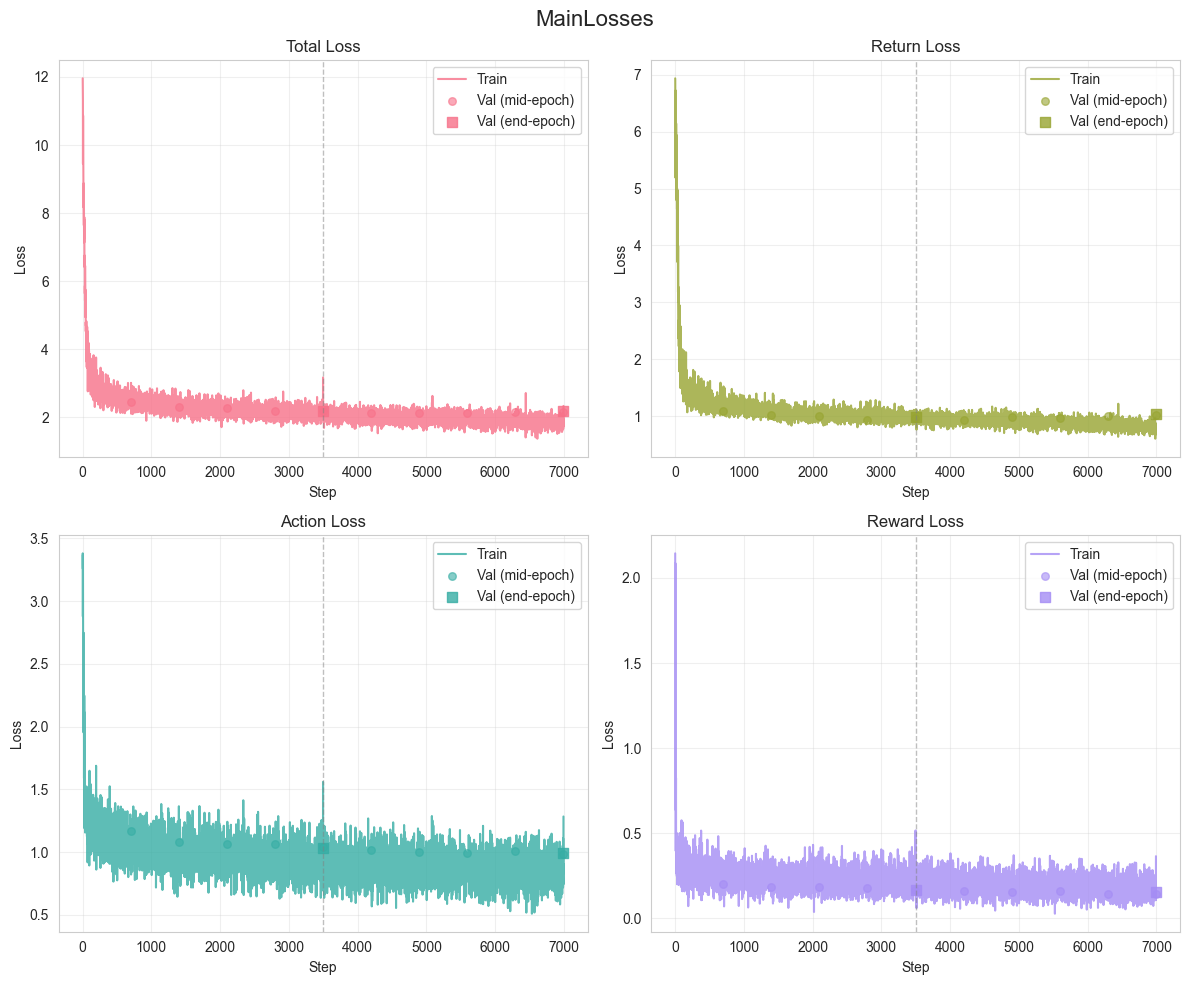

Saved plot to output\baseline\model_main_losses_combined.png


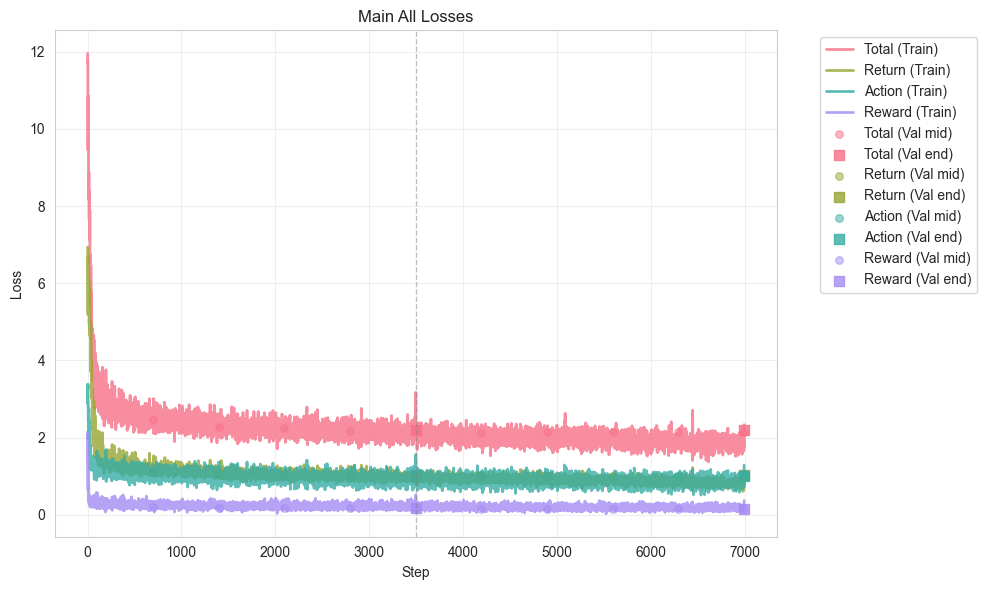

Saved plot to output\baseline\model_main_losses_ema_per_head.png


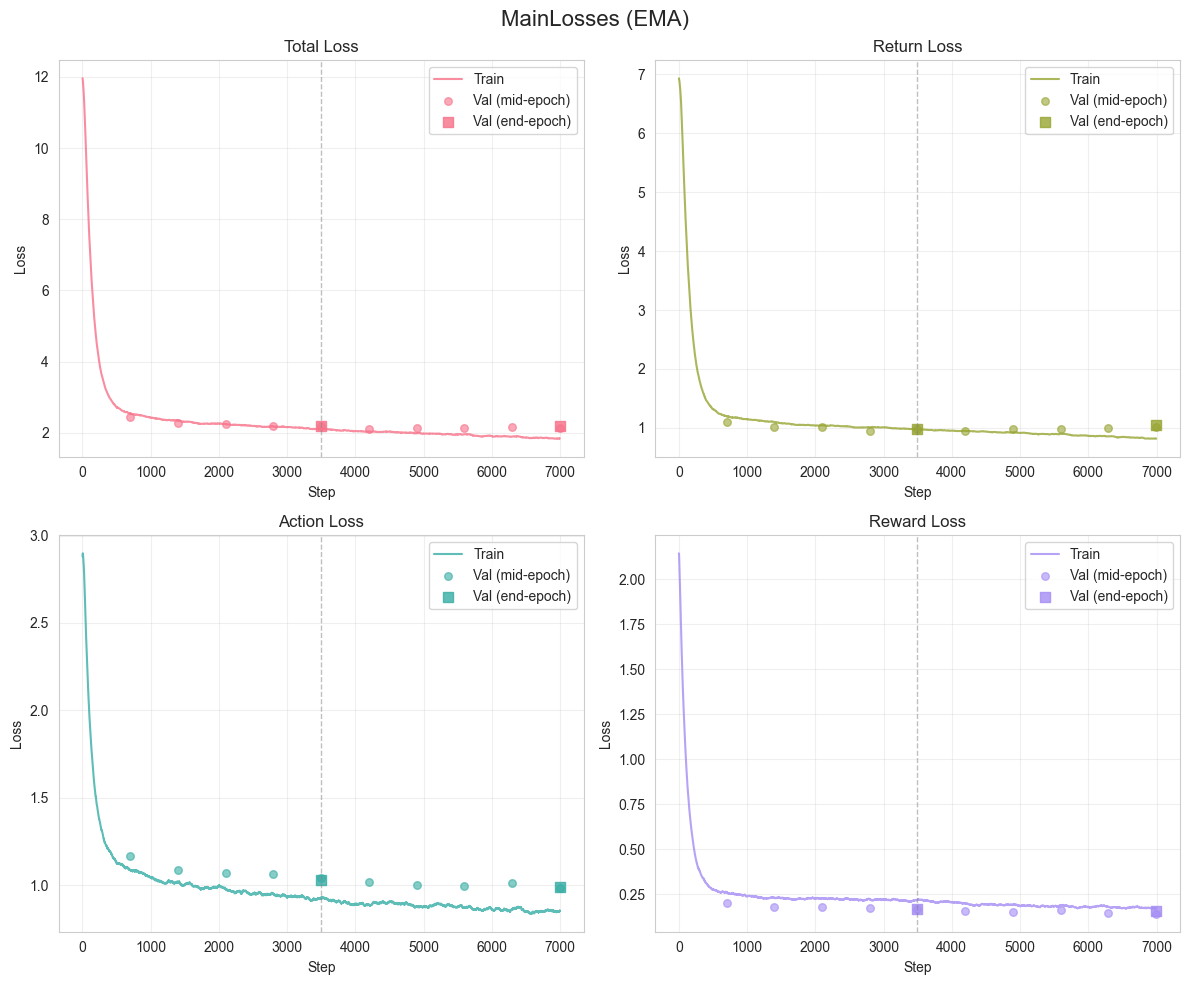

Saved plot to output\baseline\model_main_losses_ema_combined.png


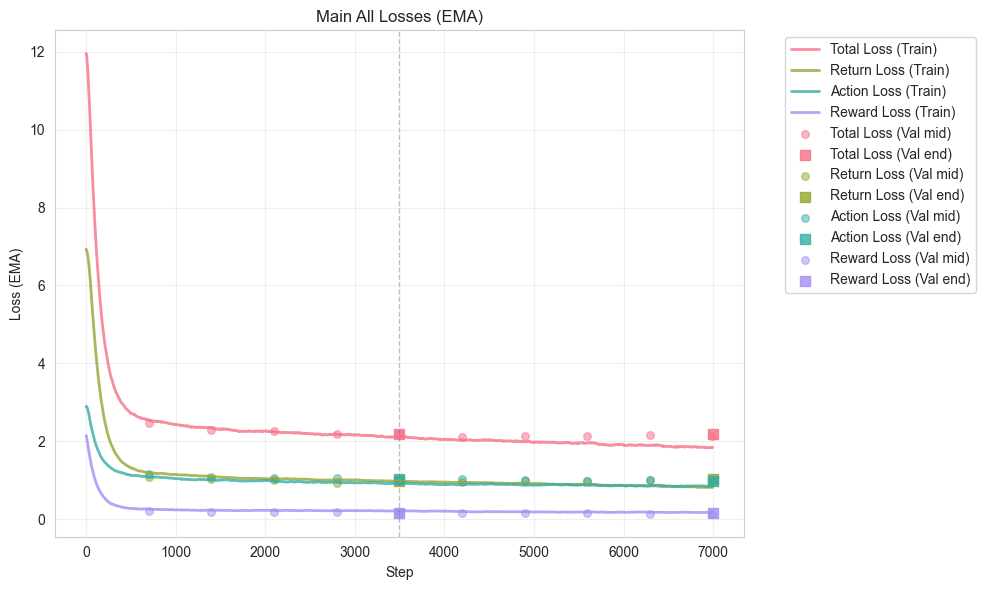

In [10]:
from mgdt_model_stats import plot_losses
plot_losses(main_train_stats, main_val_stats, output_dir=OUTPUT_DIR, title_prefix="Main")

# Train - Holdout Games

In [11]:
from mgdt_model_trainer import Encoder, train_mgdt

model, holdout_train_stats, holdout_val_stats = train_mgdt(
    model=model,
    bins=bins,
    dataloader_train=holdout_bundle.train_loader,
    dataloader_val=holdout_bundle.val_loader,
    encoder_type=Encoder.Patch,
    num_epochs=1,
)

Finetune 1/1: 100%|██████████| 537/537 [00:52<00:00, 10.23it/s]


Saved plot to output\baseline\model_holdout_losses_per_head.png


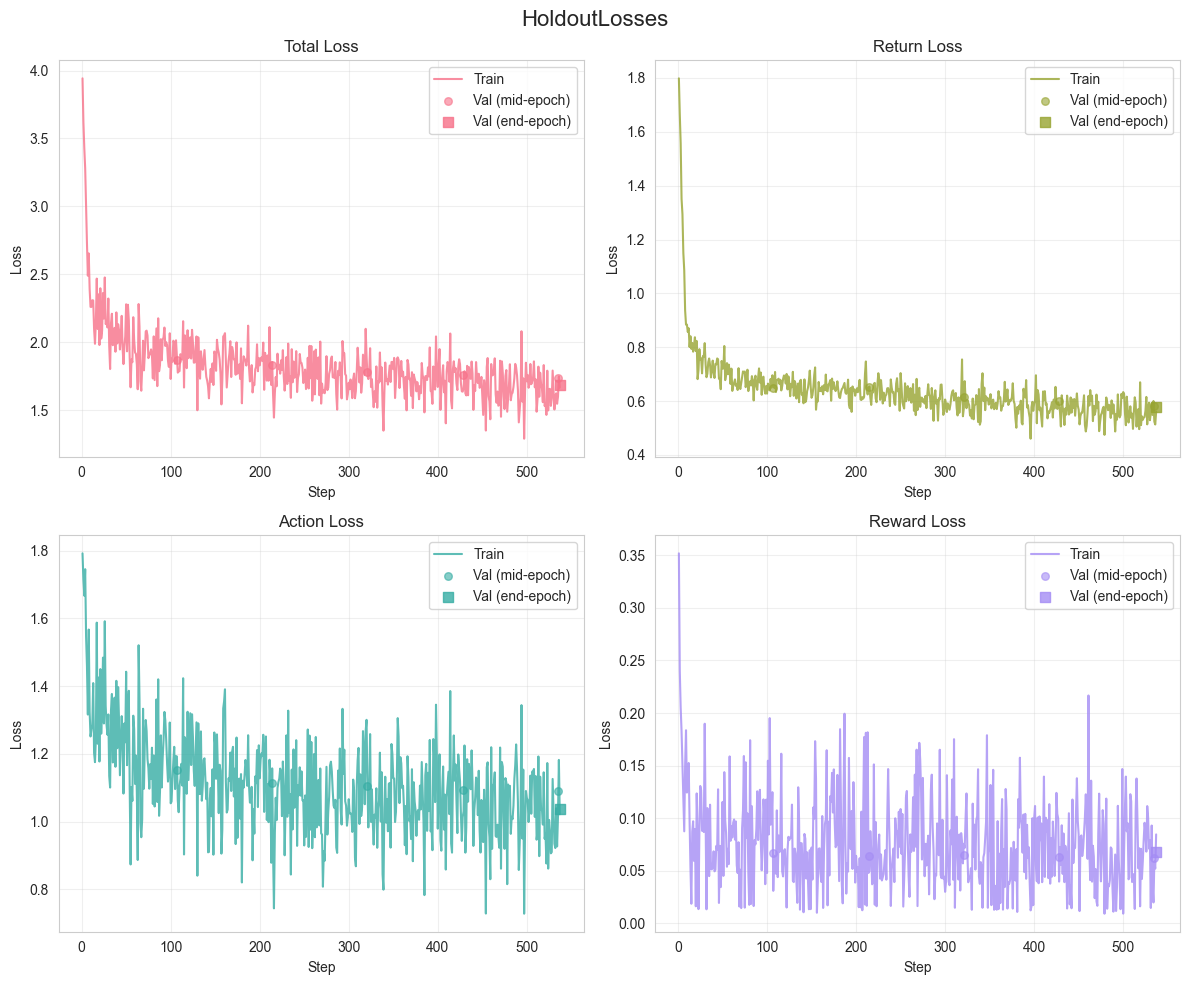

Saved plot to output\baseline\model_holdout_losses_combined.png


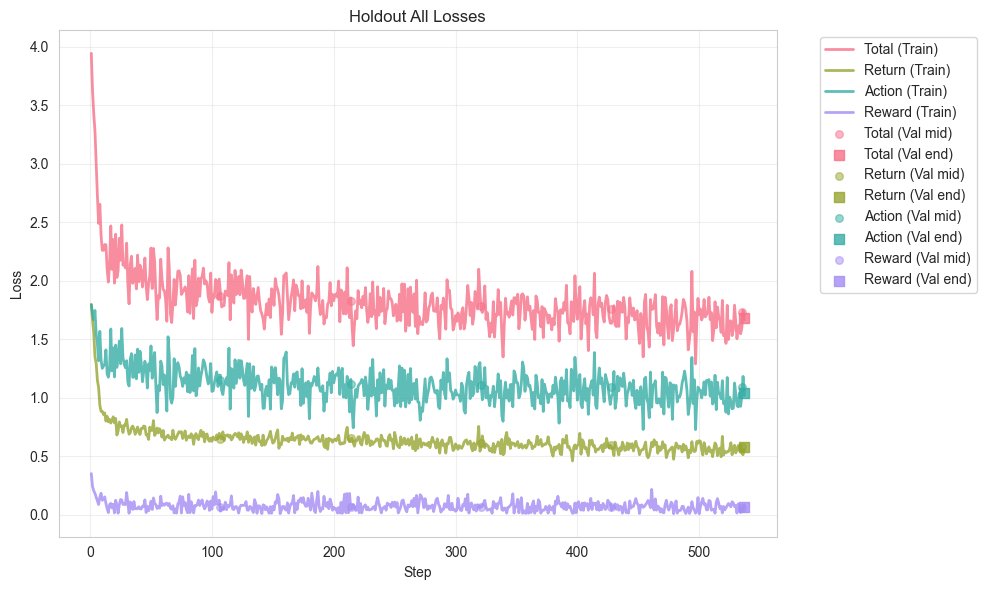

Saved plot to output\baseline\model_holdout_losses_ema_per_head.png


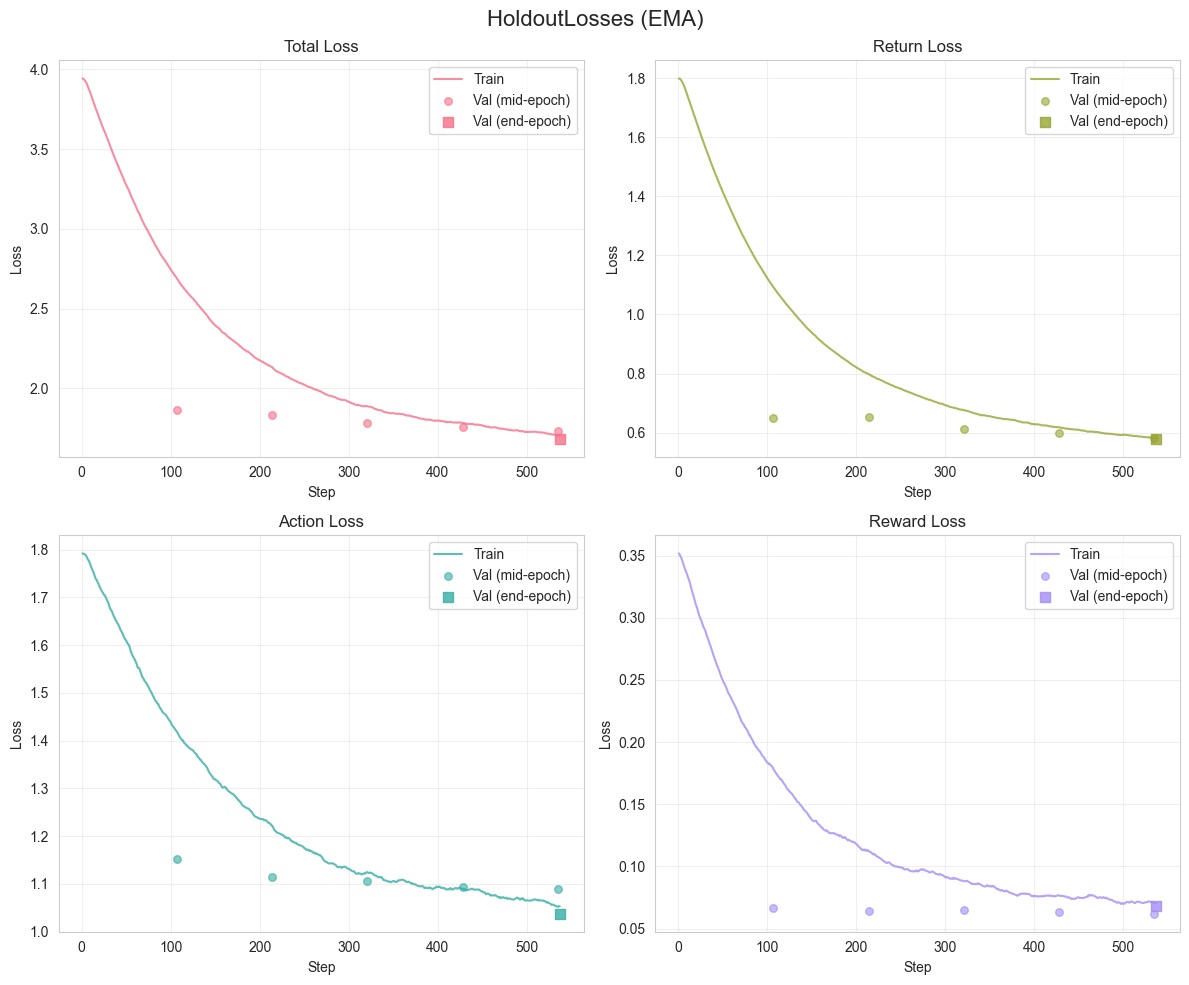

Saved plot to output\baseline\model_holdout_losses_ema_combined.png


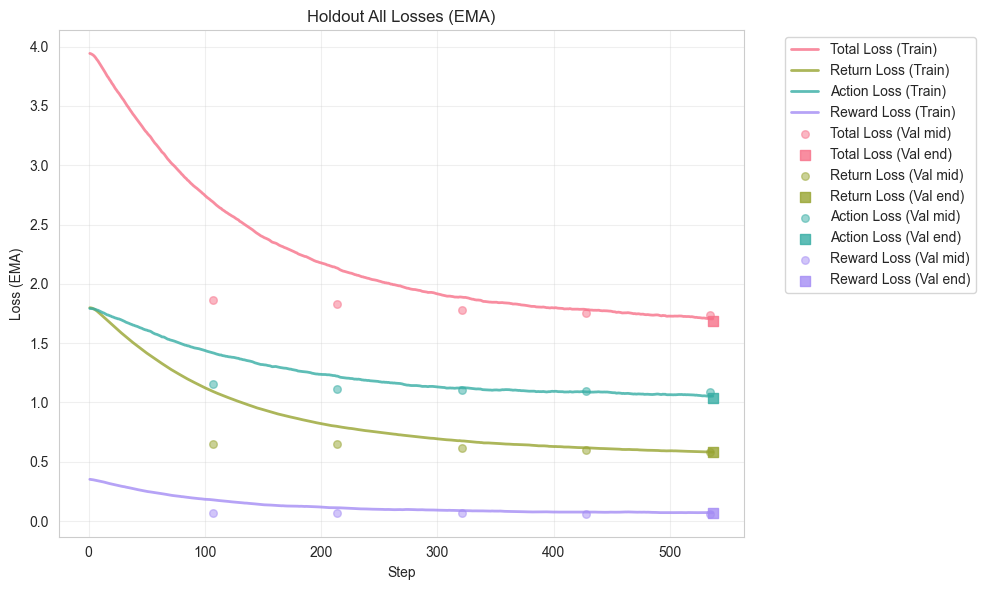

In [12]:
from mgdt_model_stats import plot_losses
plot_losses(holdout_train_stats, holdout_val_stats, output_dir=OUTPUT_DIR, title_prefix="Holdout")

# Comparison

Saved plot to output\baseline\comparison_baseline_main_vs_holdout.png


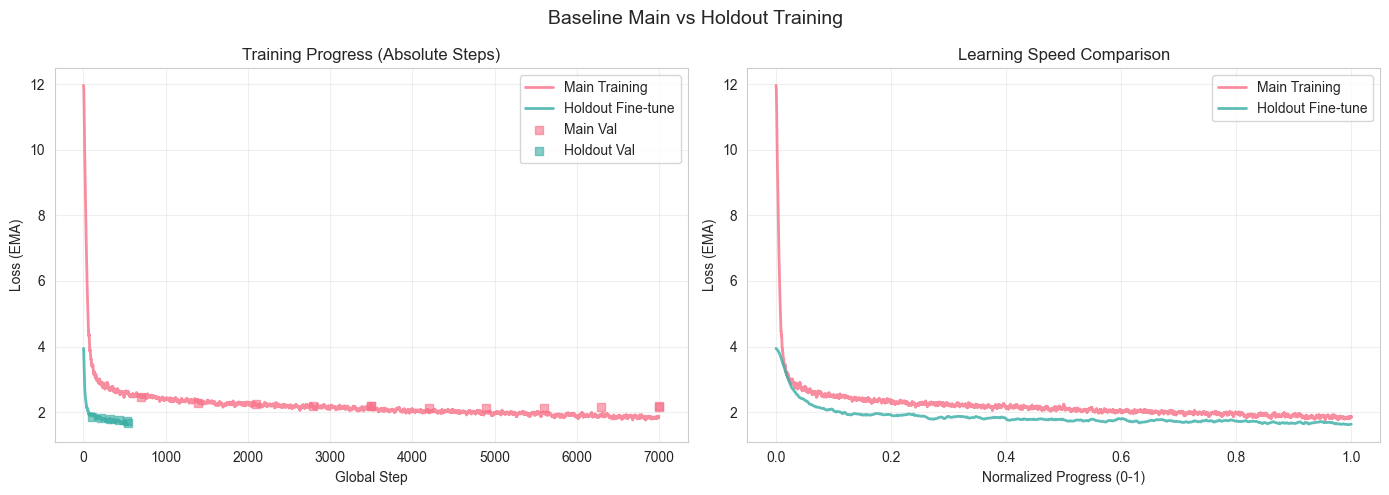

Saved plot to output\baseline\comparison_baseline_per_head_loss.png


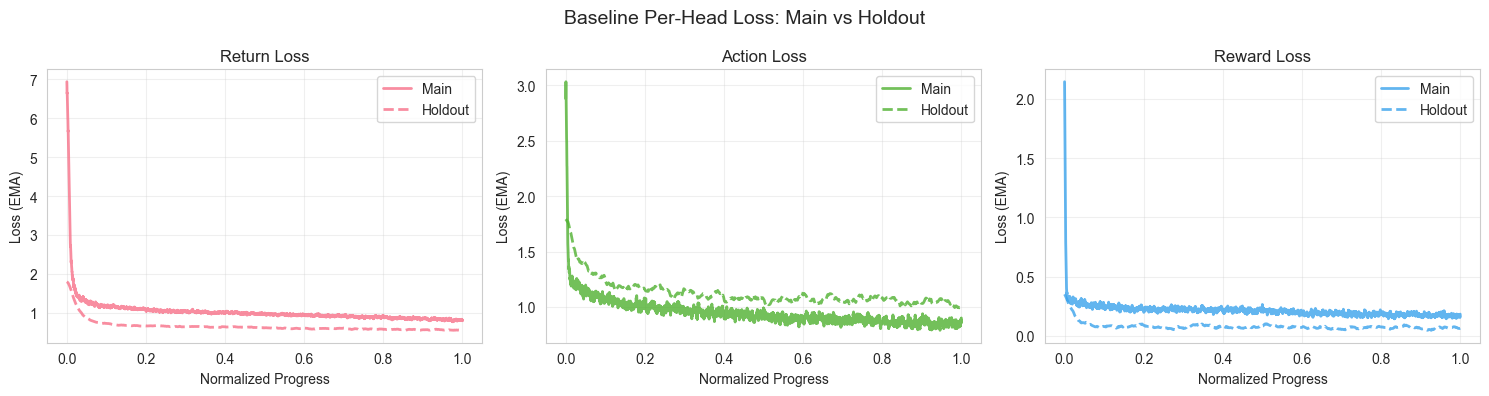

Saved plot to output\baseline\comparison_baseline_accuracy.png


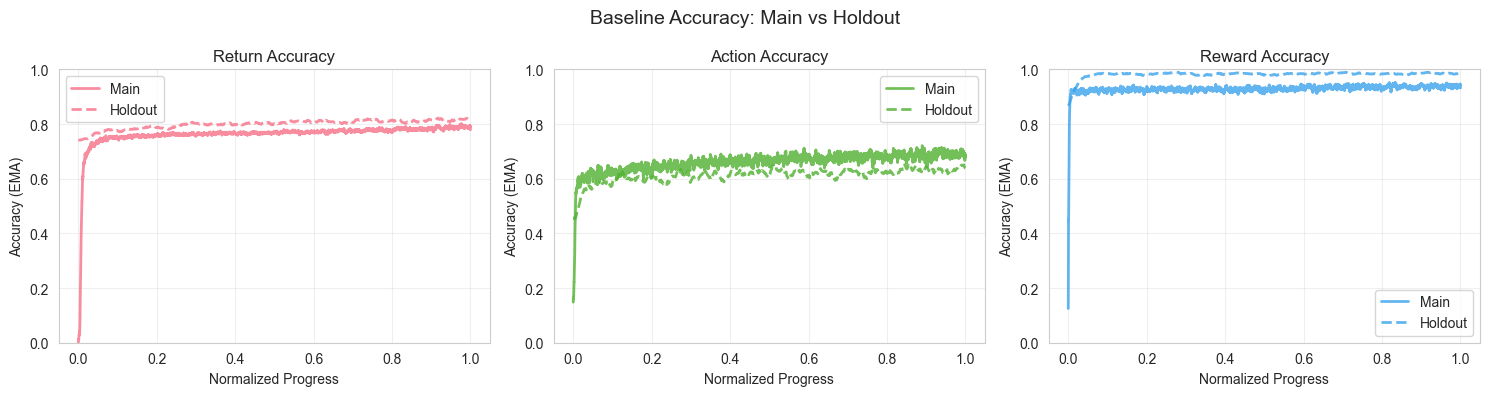


HOLDOUT ADAPTATION SUMMARY
Main training steps: 6994
Holdout fine-tune steps: 537

Main training - Final loss (EMA): 1.8823
Holdout fine-tune - Initial loss (EMA): 3.9428
Holdout fine-tune - Final loss (EMA): 1.6339
Holdout loss reduction: 2.3089

Holdout reached main's final loss at step 136 (25.3% of fine-tuning)


In [13]:
from mgdt_model_stats import plot_holdout_comparison

plot_holdout_comparison(main_train_stats, main_val_stats, holdout_train_stats, holdout_val_stats, output_dir=OUTPUT_DIR, title_prefix="Baseline")

# Model Info and Save

In [14]:
total_params = sum(param.numel() for param in model.parameters())
print(f"Total parameters: {total_params/1e6:.0f}M")

Total parameters: 20M


In [15]:
from utils import save_checkpoint

save_checkpoint(model, main_train_stats, main_val_stats, output_dir=OUTPUT_DIR)

Model and stats saved to output\baseline\model.pt


WindowsPath('output/baseline/model.pt')